In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats
import sqlite3
import warnings
warnings.filterwarnings('ignore')

In [60]:
# Load the dataset
conn = sqlite3.connect('A:\DA - Projects\Vendor Performance Analytics\database\inventory.db')

df = pd.read_sql_query("select * from vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchasesQuantity,TotalPurchasesDollars,TotalQuantitySold,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,TotalPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


# Exploratory Data Analysis
- Previously, we examined the various tables in the DB to identify key Vars, understand the relationships and determine which ones should be included in the final analysis.
- In this phase of EDA, we will analyze the resultant table to gain insights into the distibution of each column, understand data patterns and ensure data quality.

In [61]:
# summary statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchasesQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchasesDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalQuantitySold,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


In [62]:
numerical_cols = df.select_dtypes(include=np.number).columns
len(numerical_cols)

16

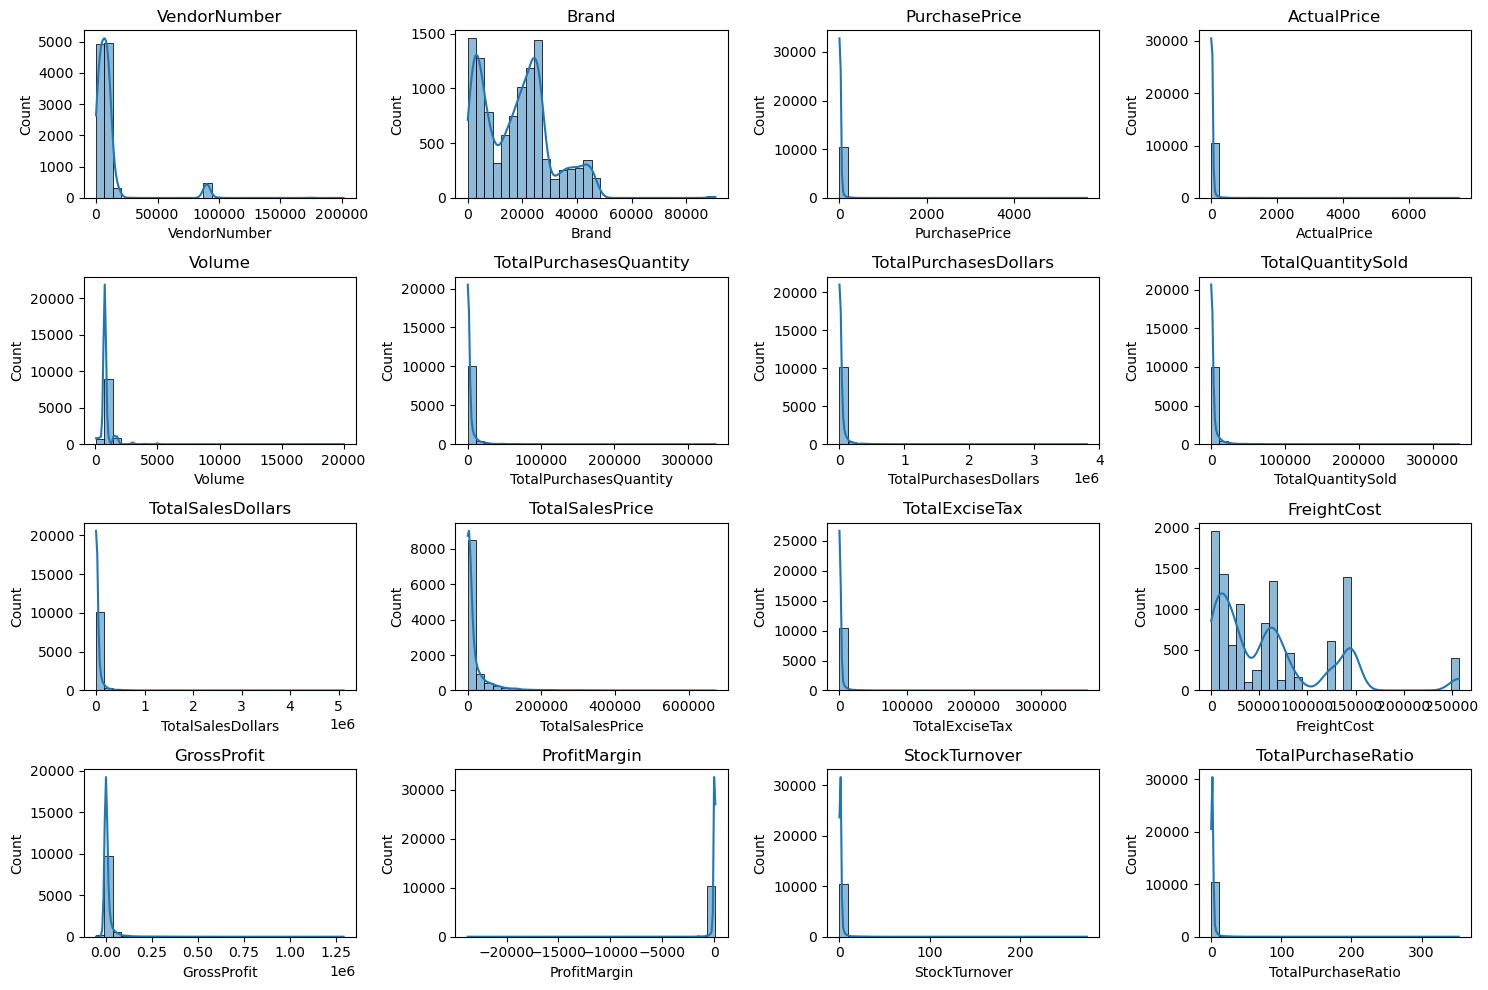

In [63]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

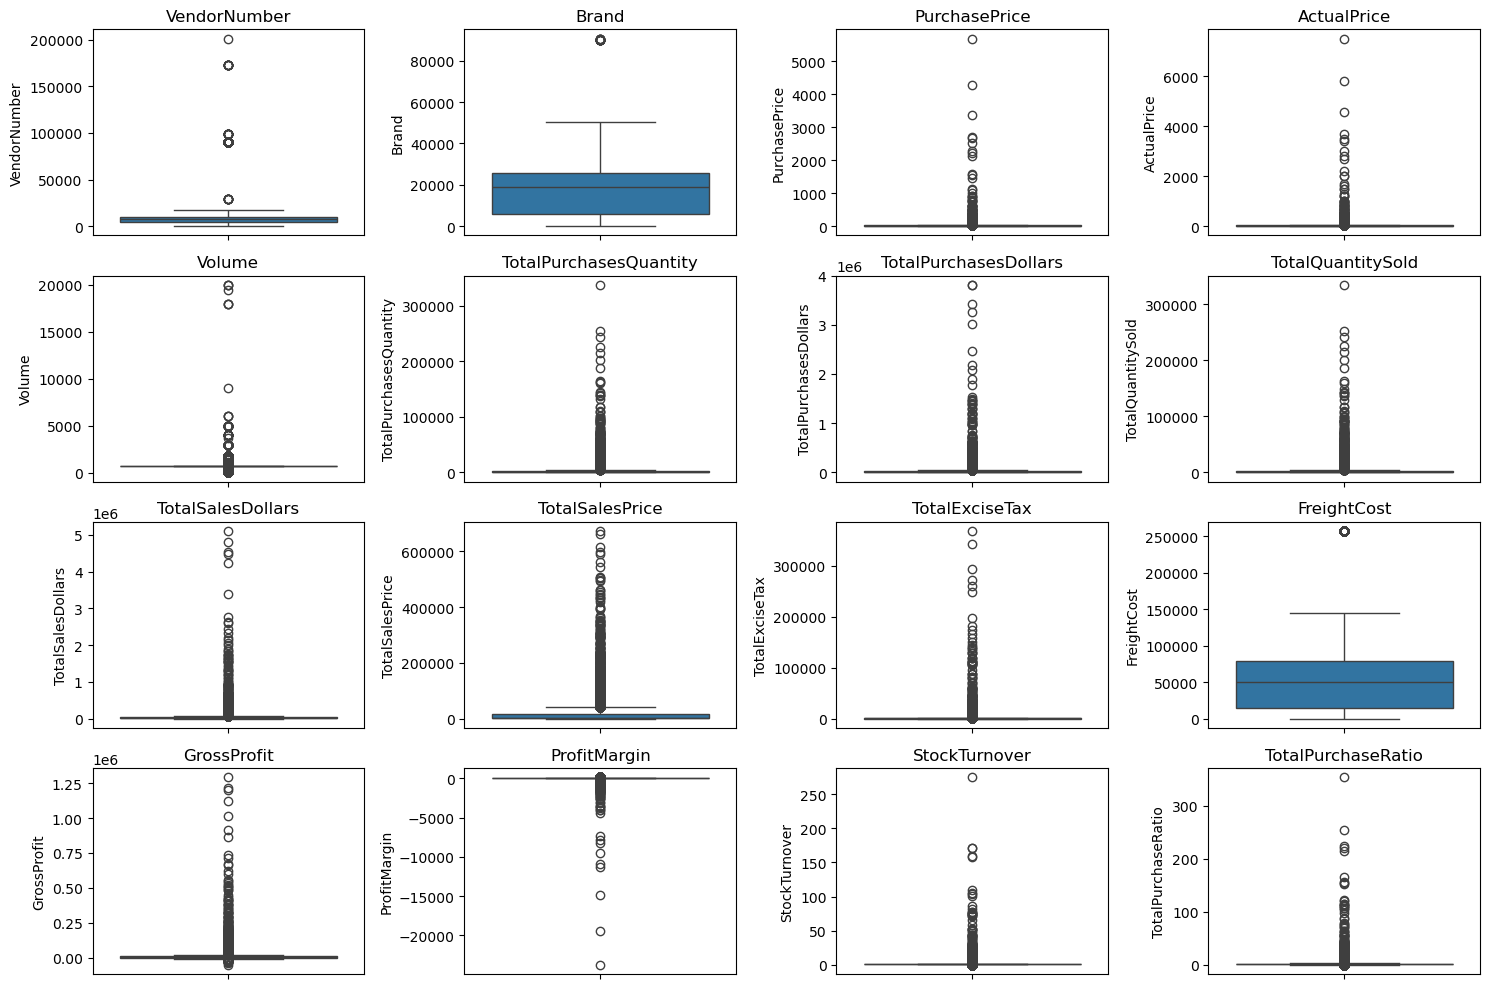

In [64]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Summary Statistics Insights:

**Negative & Zero Values:**

* **Gross Profit:** Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.
* **Profit Margin:** Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.
* **Total Sales Quantity & Sales Dollars:** Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

**Outliers Indicated by High Standard Deviations:**

* **Purchase & Actual Prices:** The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
* **Freight Cost:** Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
* **Stock Turnover:** Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [65]:
df = pd.read_sql_query("""
select * from vendor_sales_summary
                       where GrossProfit > 0 and
                       ProfitMargin >0 and
                       TotalQuantitySold > 0
""",conn)

In [66]:
df.shape

(8564, 18)

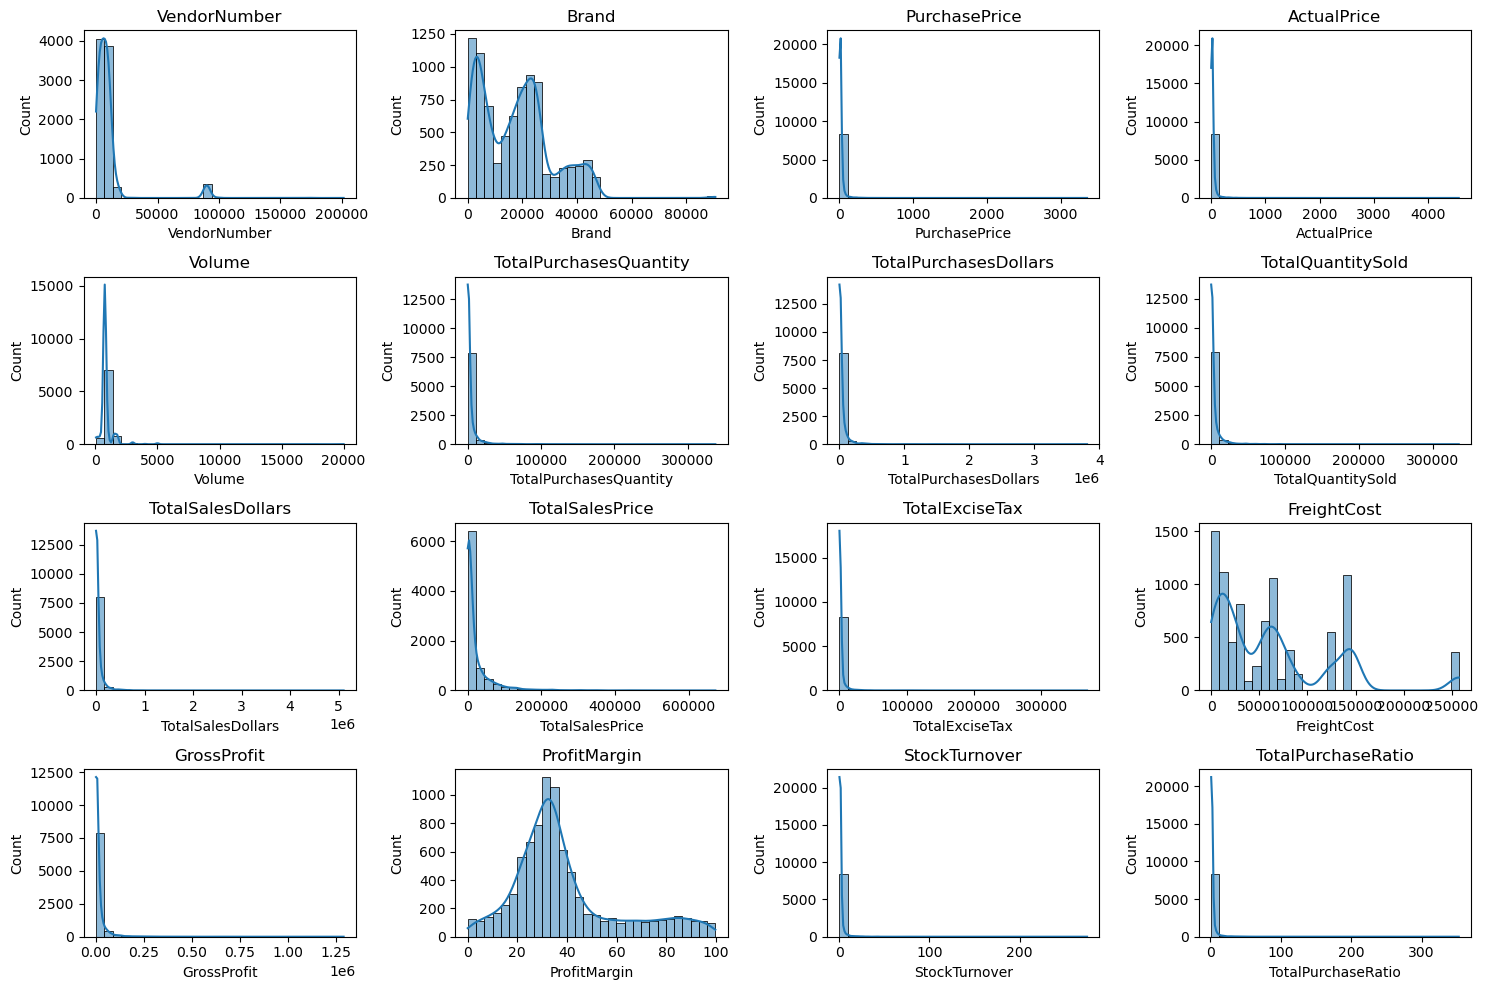

In [67]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

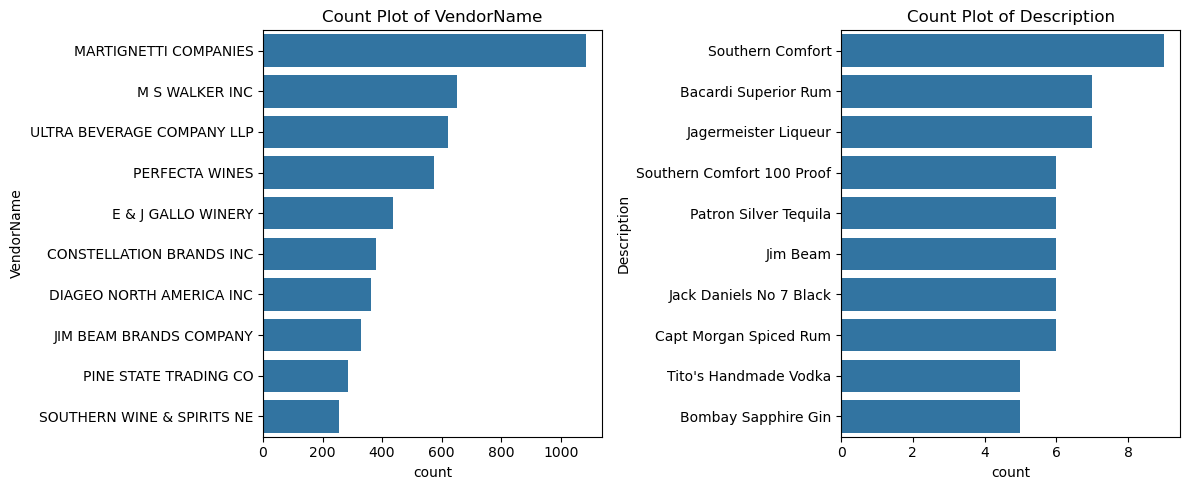

In [68]:
categorical_cols = ['VendorName', 'Description']
plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2, i+1)
    sns.countplot(y = df[col], order=df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()    

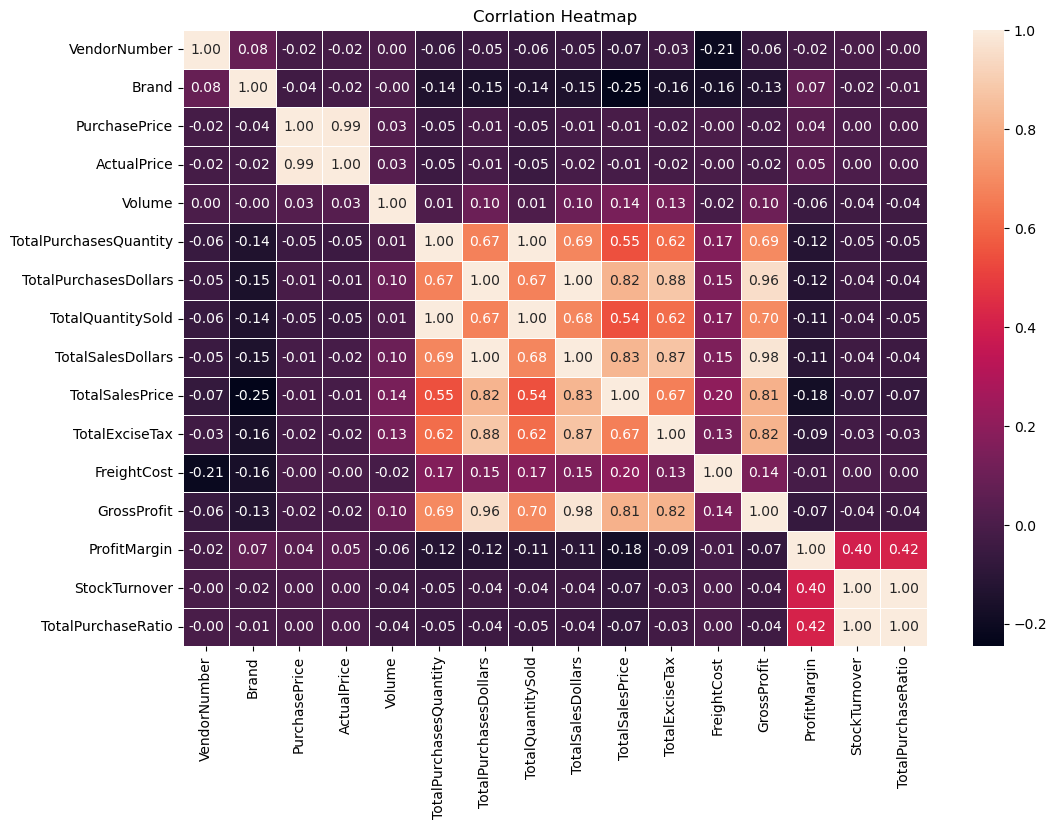

In [69]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", linewidths=.5)
plt.title("Corrlation Heatmap")
plt.show()

**Correlation Insights**
- *PurchasePrice* has weak correlations with *TotalSalesDollars* (-0.012) and *GrossProfit* (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.

- Strong correlation between *total purchase quantity* and *total sales quantity* (0.999), confirming efficient inventory turnover.

- Negative correlation between *profit margin* & *total sales price* (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

- *StockTurnover* has weak negative correlations with both *GrossProfit* (-0.038) and *ProfitMargin* (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

## Data Analysis

Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [71]:
brandPerformance  = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin': 'mean'
}).reset_index()

In [72]:
low_sales_threshold = brandPerformance['TotalSalesDollars'].quantile(.15)
high_margin_threshold = brandPerformance['ProfitMargin'].quantile(.85)

In [73]:
low_sales_threshold

560.299

In [74]:
high_margin_threshold

64.97017552750113

In [75]:
target_brands = brandPerformance[
    (brandPerformance['TotalSalesDollars'] <= low_sales_threshold)&
    (brandPerformance['ProfitMargin'] >= high_margin_threshold)]

print("Brands with low sales but High Profit Margins: ")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but High Profit Margins: 


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [76]:
brandPerformance = brandPerformance[brandPerformance['TotalSalesDollars'] < 10000] # for better visualization

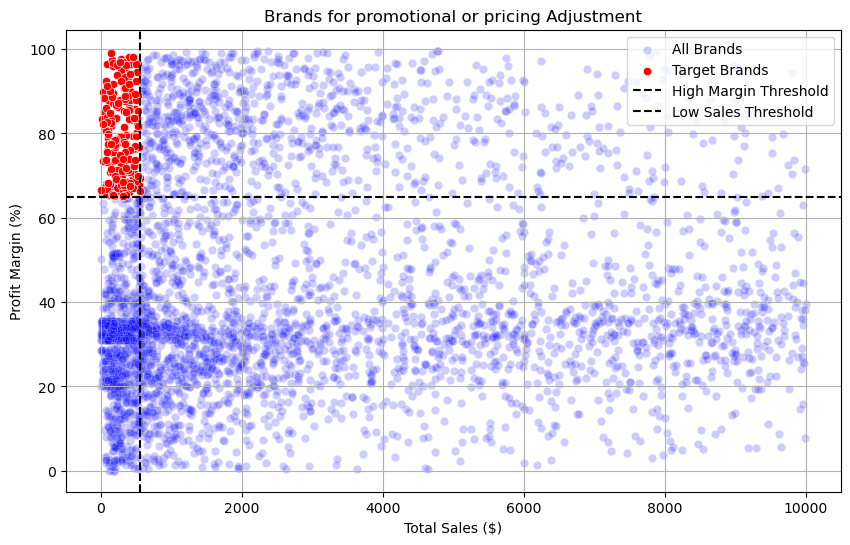

In [77]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brandPerformance, x='TotalSalesDollars', y='ProfitMargin', color="blue",label = "All Brands", alpha=.2)
sns.scatterplot(data=target_brands ,x='TotalSalesDollars', y='ProfitMargin', color="red",label = "Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label = "High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label = "Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for promotional or pricing Adjustment")
plt.legend()
plt.grid(True)
plt.show()

Which Vendors and brands demonstrate the highest sales performance?

In [78]:
def parse_sales(value):
    if isinstance(value, str):
        value = value.strip().upper()
        if value.endswith("K"):
            return float(value.replace("K", "")) * 1_000
        elif value.endswith("M"):
            return float(value.replace("M", "")) * 1_000_000
        elif value.endswith("B"):
            return float(value.replace("B", "")) * 1_000_000_000
    return float(value)


def format_sales(value):
    if value >= 1_000_000_000:
        return f"{value/1_000_000_000:.2f}B"
    elif value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)


In [79]:
TopVendors = df.groupby(['VendorName'])['TotalSalesDollars'].sum().nlargest(10)
TopBrands = df.groupby(['Description'])['TotalSalesDollars'].sum().nlargest(10)

In [80]:
TopVendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [81]:
TopBrands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [82]:
TopVendors = TopVendors.apply(lambda x :format_sales(x))
TopBrands = TopBrands.apply(lambda x :format_sales(x))

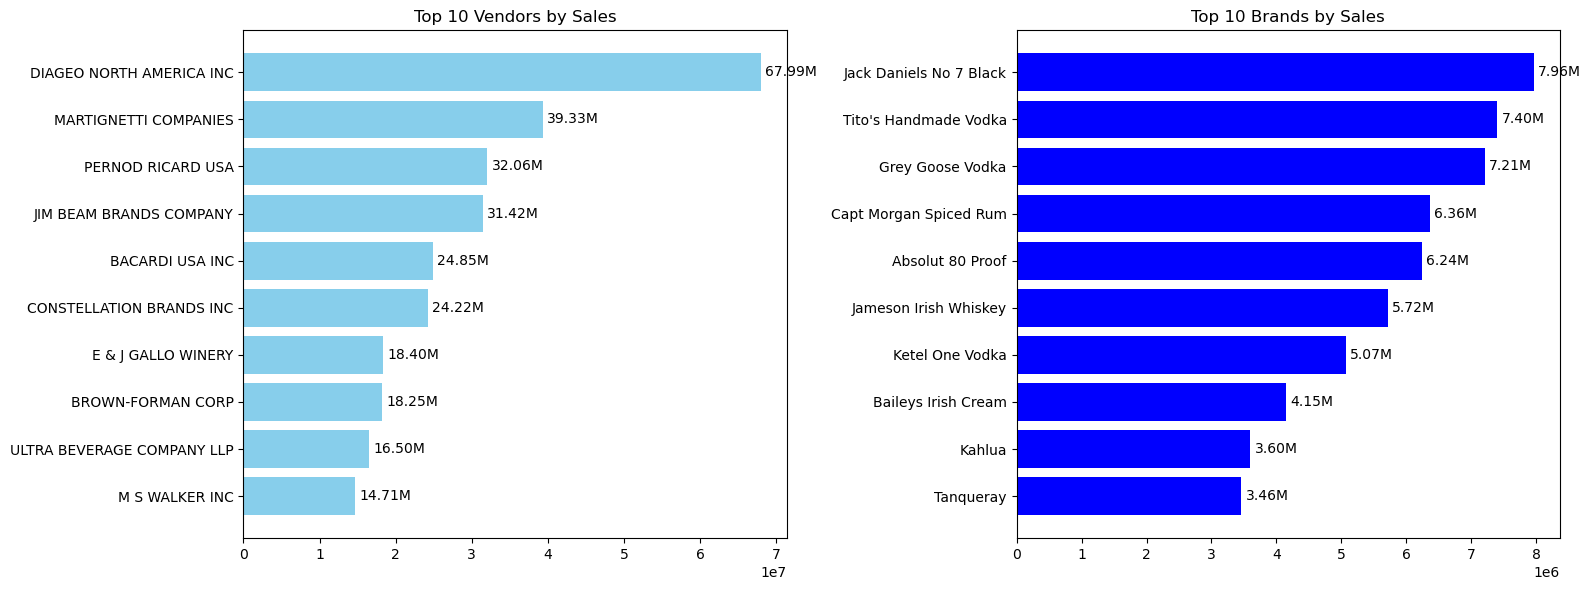

In [83]:
VendorNames = TopVendors.index.tolist()
VendorSales = [parse_sales(v) for v in TopVendors.values] 

BrandNames = TopBrands.index.tolist()
BrandSales = [parse_sales(v) for v in TopBrands.values]


plt.figure(figsize=(16,6))

ax1 = plt.subplot(1,2,1)
bars1 = ax1.barh(VendorNames, VendorSales, color="skyblue")
ax1.set_title("Top 10 Vendors by Sales")
ax1.invert_yaxis()

ax1.bar_label(bars1, labels=[format_sales(v) for v in VendorSales],
              padding=3, fontsize=10, color='black')


ax2 = plt.subplot(1,2,2)
bars2 = ax2.barh(BrandNames, BrandSales, color="blue")
ax2.set_title("Top 10 Brands by Sales")
ax2.invert_yaxis()

ax2.bar_label(bars2, labels=[format_sales(v) for v in BrandSales],
              padding=3, fontsize=10, color='black')

plt.tight_layout()
plt.show()

Which Vendors contribute the most to total purchase dollars

In [84]:
vendorPerformance = df.groupby('VendorName').agg({'TotalPurchasesDollars':'sum'
                             ,'GrossProfit':'sum',
                             'TotalSalesDollars':'sum'
                             }).reset_index()

In [85]:
vendorPerformance['PurchaseContribution%'] = vendorPerformance['TotalPurchasesDollars']/vendorPerformance['TotalPurchasesDollars'].sum()*100

In [86]:
vendorPerformance = round(vendorPerformance.sort_values(by='PurchaseContribution%', ascending=False),2)

In [87]:
topVendors = vendorPerformance.head(10)
topVendors['TotalPurchasesDollars'] = topVendors['TotalPurchasesDollars'].apply(format_sales)
topVendors['GrossProfit'] = topVendors['GrossProfit'].apply(format_sales)
topVendors['TotalSalesDollars'] = topVendors['TotalSalesDollars'].apply(format_sales)

In [88]:
topVendors

,VendorName,TotalPurchasesDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [89]:
topVendors['PurchaseContribution%'].sum()
# the top 10 vendors 66% contrubtion and all other 109 vendors are only 34% !!

65.69000000000001

In [90]:
topVendors['ColmulativeContribution%'] = topVendors['PurchaseContribution%'].cumsum()
topVendors

,VendorName,TotalPurchasesDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,ColmulativeContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


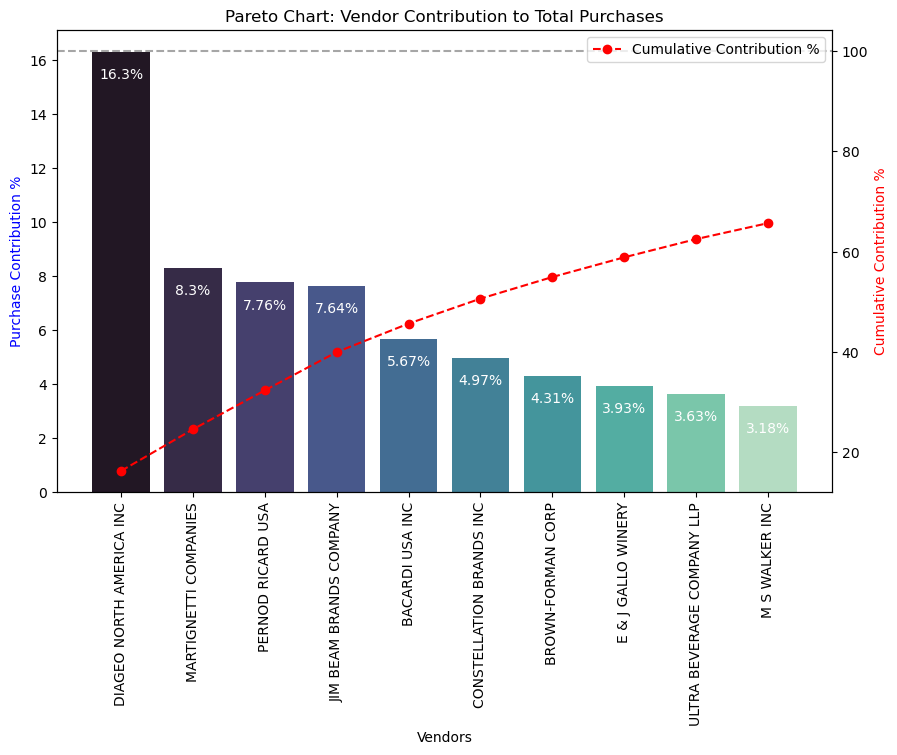

In [91]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution %
sns.barplot(x=topVendors['VendorName'], y=topVendors['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(topVendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution %
ax2 = ax1.twinx()
ax2.plot(topVendors['VendorName'], topVendors['ColmulativeContribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution %')

ax1.set_xticklabels(topVendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

How Much of Total procurement is dependant on the top vendors?

In [92]:
print(f"Total Purchase Contribution of top 10 vendors is {round(topVendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 65.69 %


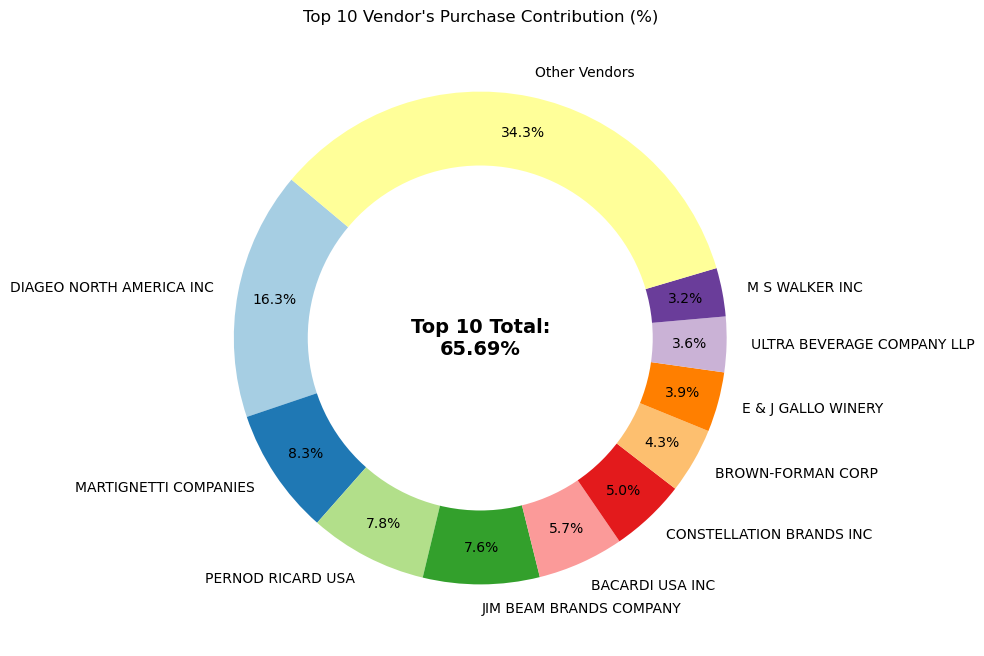

In [93]:
vendors = list(topVendors['VendorName'].values)
purchase_contributions = list(topVendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

Does purching in bulk reduce the unit price , and what is the optimal purchase volume for cost saving?

In [94]:
df['UnitPurchasePrice'] = df['TotalPurchasesDollars']/ df['TotalPurchasesQuantity']

In [95]:
df['OrderSize'] = pd.qcut(df["TotalPurchasesQuantity"], q=3, labels=['Small', 'Medium', 'Large'])

In [96]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


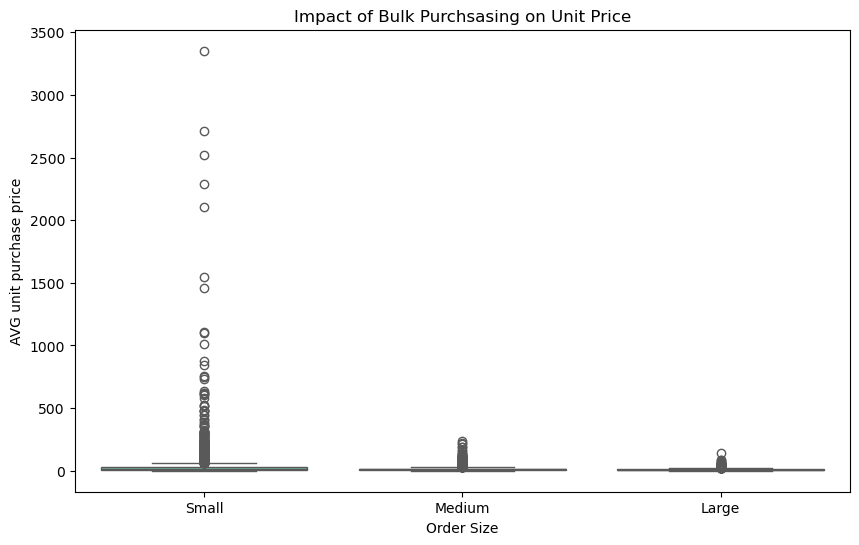

In [97]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='OrderSize', y='UnitPurchasePrice', palette='Set2')
plt.title("Impact of Bulk Purchsasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("AVG unit purchase price")
plt.show()

- **Vendors buying in bulk** (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
- **The price difference between Small and Large orders is substantial** (~72% reduction in unit cost).
- **This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes**, leading to higher overall sales despite lower per-unit revenue.

Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [98]:
df[df['StockTurnover']<1].groupby(['VendorName'])[['StockTurnover']].mean().nsmallest(10,'StockTurnover')

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [99]:
df['UnsoldInvertoryValue'] = (df['TotalPurchasesQuantity']-df['TotalQuantitySold'])*df['PurchasePrice']
print('Total Unsold Capital: ', format_sales(df['UnsoldInvertoryValue'].sum()))

Total Unsold Capital:  2.71M


In [100]:
inventory_value_per_vendor = df.groupby('VendorName')[['UnsoldInvertoryValue']].sum().nlargest(10, 'UnsoldInvertoryValue').reset_index()

In [101]:
inventory_value_per_vendor['UnsoldInvertoryValue'] = inventory_value_per_vendor['UnsoldInvertoryValue'].apply(format_sales)

In [102]:
inventory_value_per_vendor

,VendorName,UnsoldInvertoryValue
0,DIAGEO NORTH AMERICA INC,722.21K
1,JIM BEAM BRANDS COMPANY,554.67K
2,PERNOD RICARD USA,470.63K
3,WILLIAM GRANT & SONS INC,401.96K
4,E & J GALLO WINERY,228.28K
5,SAZERAC CO INC,198.44K
6,BROWN-FORMAN CORP,177.73K
7,CONSTELLATION BRANDS INC,133.62K
8,MOET HENNESSY USA INC,126.48K
9,REMY COINTREAU USA INC,118.60K


What is the 95% confidence intervals for profit margins of top-performing and low-performaing vendors

In [103]:
top_threshold = df['TotalSalesDollars'].quantile(.75)
low_threshold = df['TotalSalesDollars'].quantile(.25)

In [104]:
top_vendors = df[df['TotalSalesDollars']>=top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars']<=low_threshold]['ProfitMargin'].dropna()

In [105]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [106]:
def confidence_interval(data, confidence=.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1)/ np.sqrt(len(data))
    t_critical = stats.t.ppf((1+confidence)/2, df=len(data)-1)
    margin_of_error = t_critical*std_err
    return mean_val,mean_val - margin_of_error,mean_val+margin_of_error

Top Vendors 95% CI: ([30.74, 31.61]), Mean: 31.18
Low Vendors 95% CI: ([40.50, 42.64]), Mean: 41.57


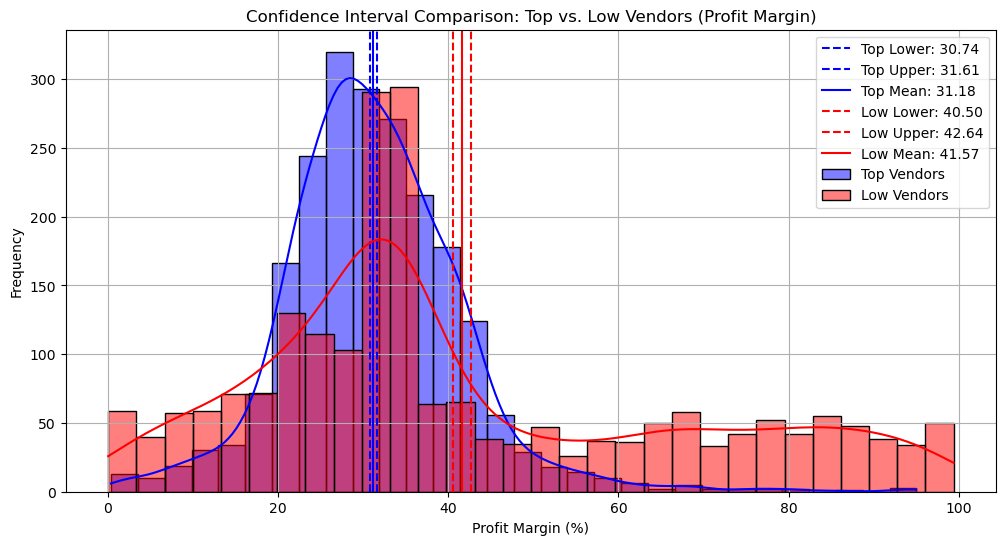

In [107]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ([{top_lower:.2f}, {top_upper:.2f}]), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ([{low_lower:.2f}, {low_upper:.2f}]), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

### **Confidence Interval Analysis: Top vs. Low-Performing Vendors**

- The confidence interval for low-performing vendors (**40.48% to 42.62%**) is significantly higher than that of top-performing vendors (**30.74% to 31.61%**).
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
- **For High-Performing Vendors:** If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
- **For Low-Performing Vendors:** Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.


### **Is there a significant difference in profit margins between top-performing and low-performing vendors?**

**Hypothesis:**

$H_0$ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

$H_a$ (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.


In [108]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform a Two-Sample T-Test to compare the means of the two groups
# We set equal_var=False because we assume the variances of the two groups are not equal (Welch's T-test)
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print the results of the T-test
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

# Make a decision based on the p-value
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")


T-Statistic: -17.6695, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.


In [109]:
tables = pd.read_sql_query("SELECT * FROM sqlite_master WHERE type='table'", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,begin_inventory,begin_inventory,2,"CREATE TABLE begin_inventory (\n\t""InventoryId..."
1,table,end_inventory,end_inventory,4656,"CREATE TABLE end_inventory (\n\t""InventoryId"" ..."
2,table,purchases,purchases,9717,"CREATE TABLE purchases (\n\t""InventoryId"" TEXT..."
3,table,purchase_prices,purchase_prices,103198,"CREATE TABLE purchase_prices (\n\t""Brand"" BIGI..."
4,table,sales,sales,103482,"CREATE TABLE sales (\n\t""InventoryId"" TEXT, \n..."
5,table,vendor_invoice,vendor_invoice,531046,"CREATE TABLE vendor_invoice (\n\t""VendorNumber..."
6,table,vendor_sales_summary,vendor_sales_summary,531178,"CREATE TABLE ""vendor_sales_summary"" (\n""Vendor..."


In [110]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchasesQuantity,TotalPurchasesDollars,TotalQuantitySold,...,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,TotalPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInvertoryValue
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,...,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large,79624.37
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,...,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,Large,87913.29
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,...,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large,4870.08
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,...,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large,20535.90
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,...,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,Large,49712.19


In [113]:
df.to_csv("A:/DA - Projects/Vendor Performance Analytics/Processed Data/Vendor_Sales_Summary.csv",index=False)